# Compare Natural Cause Deaths in the US from 2019 to 2020

In [ ]:
import os
import io
import re
import urllib

import pandas as pd
import matplotlib.pyplot as plt

## Load Weekly 2019/2020 Data

Data pulled from:

https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/muzy-jte6

In [2]:
data_url = "https://data.cdc.gov/api/views/muzy-jte6/rows.csv?accessType=DOWNLOAD"
with urllib.request.urlopen(data_url) as fh:
    weekly_deaths_by_state = pd.read_csv(fh)

In [3]:
weekly_deaths_by_state["Week Ending Date"] = pd.to_datetime(weekly_deaths_by_state["Week Ending Date"])
weekly_deaths_by_state["Month"] = weekly_deaths_by_state["Week Ending Date"].dt.month
weekly_deaths_by_state["Year"] = weekly_deaths_by_state["Week Ending Date"].dt.year

In [4]:
# Filter to United States
# States are listed as well, but US has the sums
mortality_counts_recent = weekly_deaths_by_state\
    [weekly_deaths_by_state['Jurisdiction of Occurrence'] == 'United States']\
    .groupby(['Year', 'Month'])\
    .agg({'Natural Cause': 'sum', 'All Cause': 'sum'})\
    .reset_index()

mortality_counts_recent.sample(3)

,Year,Month,Natural Cause,All Cause
16,2020,5,294738.0,320801.0
15,2020,4,281947.0,301296.0
5,2019,6,238897.0,263705.0


In [5]:
year_comparison = pd.merge(
    mortality_counts_recent[mortality_counts_recent.Year == 2019],
    mortality_counts_recent[mortality_counts_recent.Year == 2020],
    on=['Month'],
    suffixes=('_2019', '_2020'))

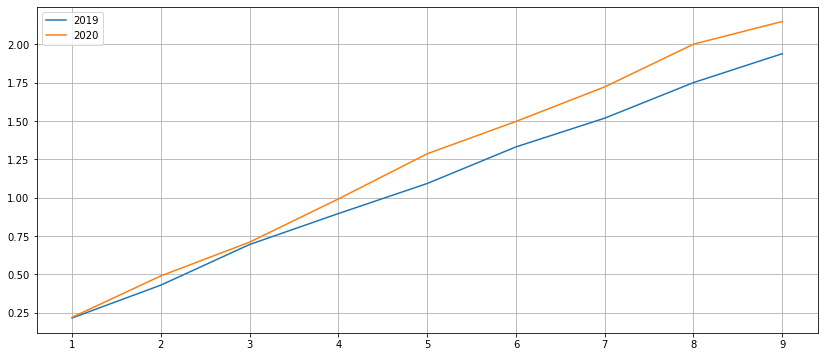

In [6]:
plt.figure(figsize=(14, 6))
for year in [2019, 2020]:
    plt.plot(year_comparison.Month, year_comparison[f"Natural Cause_{year}"].cumsum() / 1000000, label=year)
plt.legend()
plt.grid()
plt.show()

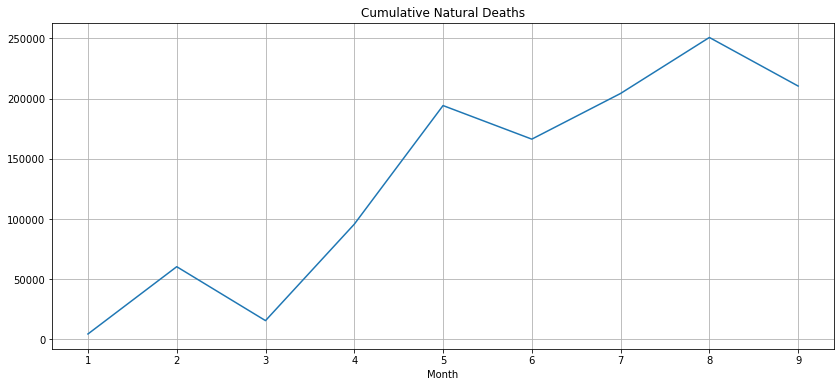

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(
    year_comparison.Month,
    year_comparison["Natural Cause_2020"].cumsum() - year_comparison["Natural Cause_2019"].cumsum())
plt.title("Cumulative Natural Deaths")
plt.grid()
plt.xlabel("Month")
plt.show()